# Explore here

Usaremos la API de Kaggle para descargar los datos del proyecto

In [44]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# ya que hemos instalado la API de Kaggle procedmos a descrgar los archivos
'''
import os

# Nombre de la competencia en Kaggle
competition = 'isic-2024-challenge'

# Carpeta donde guardar los archivos descargados
download_folder = '/Users/luiseduardogarciablanco/Desktop/bootcamp/Archivos proyecto cancer/descargas_isic2024'
os.makedirs(download_folder, exist_ok=True)

# Comando para descargar los datos
os.system(f'kaggle competitions download -c {competition} -p "{download_folder}"')

print(f'Datos descargados y guardados en {download_folder}')
'''

In [45]:
#comprobamos la existencia de los archivos descargados

import os

download_folder = '/Users/luiseduardogarciablanco/Desktop/bootcamp/Archivos_proyecto_cancer/isic-2024-challenge'

for file_name in os.listdir(download_folder):
    print(file_name)

.DS_Store
train-image
train-metadata.csv
test-image.hdf5
train-image.hdf5
test-metadata.csv
sample_submission.csv


In [46]:
#una vez descargado cargamos el csv y revisamos

# Ruta del archivo CSV
file_path = '/Users/luiseduardogarciablanco/Desktop/bootcamp/Proyecto_Final_Cancer/data/raw/train-metadata.csv'

# Cargar el archivo CSV en un DataFrame
metadata = pd.read_csv(file_path)

# Ver las primeras filas del DataFrame
print(metadata.head())

        isic_id  target  patient_id  age_approx   sex anatom_site_general  \
0  ISIC_0015670       0  IP_1235828        60.0  male     lower extremity   
1  ISIC_0015845       0  IP_8170065        60.0  male           head/neck   
2  ISIC_0015864       0  IP_6724798        60.0  male     posterior torso   
3  ISIC_0015902       0  IP_4111386        65.0  male      anterior torso   
4  ISIC_0024200       0  IP_8313778        55.0  male      anterior torso   

   clin_size_long_diam_mm          image_type tbp_tile_type   tbp_lv_A  ...  \
0                    3.04  TBP tile: close-up     3D: white  20.244422  ...   
1                    1.10  TBP tile: close-up     3D: white  31.712570  ...   
2                    3.40  TBP tile: close-up        3D: XP  22.575830  ...   
3                    3.22  TBP tile: close-up        3D: XP  14.242329  ...   
4                    2.73  TBP tile: close-up     3D: white  24.725520  ...   

    lesion_id  iddx_full  iddx_1  iddx_2  iddx_3  iddx_4  iddx

/var/folders/sc/w6cv9_291mqc4c1m0qn06_4m0000gn/T/ipykernel_77534/1850771593.py:7: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(file_path)


In [47]:
# Tamaño del DataFrame
print("Tamaño del DataFrame:", metadata.shape)

# Información sobre las columnas y tipos de datos
print(metadata.info())

# Resumen estadístico de las columnas numéricas
print(metadata.describe())

# Revisión de valores nulos
print(metadata.isnull().sum())

Tamaño del DataFrame: (401059, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Be

revisamos la columna patient_id ya que tenemos la certeza de que hay valores duplicados, con seguridad hay muchas muestras que pertenecen al mismo paciente, esto nos ayudará a llenar los datos faltantes

In [48]:
# Imprimir el número de registros únicos en la columna 'patient_id'
print(f"Número de pacientes únicos en 'patient_id': {metadata['patient_id'].nunique()}")

# Imprimir el número total de registros en el DataFrame
print(f"Número total de registros en el DataFrame: {len(metadata)}")

Número de pacientes únicos en 'patient_id': 1042
Número total de registros en el DataFrame: 401059


Al revisar el Df metadata nos damos cuentas que por ejemplo en la columna "sex" faltan datos, lo comprobaremos y llenaremos.

verificaremos que tipos de datos contienen la columna y que posiblemente algunos de los registros pertenecientes al mismo paciente les falta el dato "sex"

In [49]:
# Imprimir los valores únicos en la columna 'sex'
print(f"Valores únicos en 'sex': {metadata['sex'].unique()}")

# Imprimir la frecuencia de cada valor en la columna 'sex'
print("Frecuencia de cada valor en 'sex':")
print(metadata['sex'].value_counts())

# Imprimir la frecuencia de cada valor en la columna 'sex', incluyendo los NaN
print("Frecuencia de cada valor en 'sex' (incluyendo NaN):")
print(metadata['sex'].value_counts(dropna=False))

Valores únicos en 'sex': ['male' 'female' nan]
Frecuencia de cada valor en 'sex':
sex
male      265546
female    123996
Name: count, dtype: int64
Frecuencia de cada valor en 'sex' (incluyendo NaN):
sex
male      265546
female    123996
NaN        11517
Name: count, dtype: int64


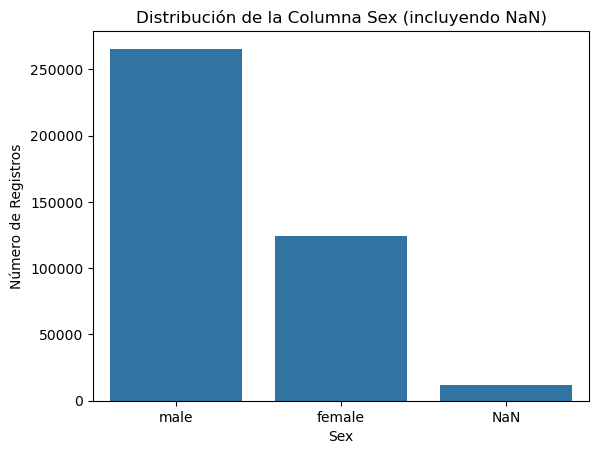

In [50]:
# graficamos para verificar los datos de la columna "sex" incluyendo valores NaN como tercera columna

# Agregar una categoría 'NaN' para los valores faltantes en 'sex'
metadata['sex_nan'] = metadata['sex'].fillna('NaN')

# Crear un gráfico de barras de la distribución de 'sex', incluyendo 'NaN'
sns.countplot(x='sex_nan', data=metadata, order=metadata['sex_nan'].value_counts().index)
plt.title('Distribución de la Columna Sex (incluyendo NaN)')
plt.xlabel('Sex')
plt.ylabel('Número de Registros')
plt.show()

vemos que hay valores NaN, como es posible que los valores pertenezcan a un mismo paciente, revisaremos y en caso de que pertenezcan al mismo paciente los completamos con su mismo tipo, en caso de que el registro de un paciente este completamente vacio ( sin determinar el sexo) lo llenaremos con la "moda" en la variable 

In [51]:

# Rellenar valores faltantes basados en el mismo patient_id
metadata['sex'] = metadata.groupby('patient_id')['sex'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

#  Calcular la moda de la columna 'sex'
sex_moda = metadata['sex'].mode()[0]
print(f"La moda de la columna 'sex' es: {sex_moda}")

# Paso 3: Rellenar los valores faltantes en 'sex' con la moda para los pacientes que tenga la ausencia total del sato "sex"
metadata['sex'].fillna(sex_moda, inplace=True)

# Verificar si aún quedan valores NaN
print(f"Valores faltantes en 'sex' después de rellenar con la moda: {metadata['sex'].isna().sum()}")

La moda de la columna 'sex' es: male
Valores faltantes en 'sex' después de rellenar con la moda: 0


In [52]:
# Imprimir la frecuencia de cada valor en la columna 'sex', incluyendo los NaN
print("Frecuencia de cada valor en 'sex' (incluyendo NaN):")
print(metadata['sex'].value_counts(dropna=False))

Frecuencia de cada valor en 'sex' (incluyendo NaN):
sex
male      277063
female    123996
Name: count, dtype: int64


haremos lo mismo con la columna age_approx, donde rellenaremos los valores faltantes

In [53]:
# Verificar el tipo de datos de la columna 'age_approx'
print(f"Tipo de datos de la columna 'age_approx': {metadata['age_approx'].dtype}")

# Contar los tipos de datos distintos en la columna 'age_approx'
print(f"Tipos de datos distintos en 'age_approx':")
print(metadata['age_approx'].apply(type).value_counts())

# Contar los valores nulos (NaN) en la columna 'age_approx'
print(f"Valores nulos en 'age_approx': {metadata['age_approx'].isna().sum()}")

Tipo de datos de la columna 'age_approx': float64
Tipos de datos distintos en 'age_approx':
age_approx
<class 'float'>    401059
Name: count, dtype: int64
Valores nulos en 'age_approx': 2798


vemos que existen valores nulos que trataremos de la misma forma que los valores Sex

primero graficaremos para visualizar la explicabilidad de los datos

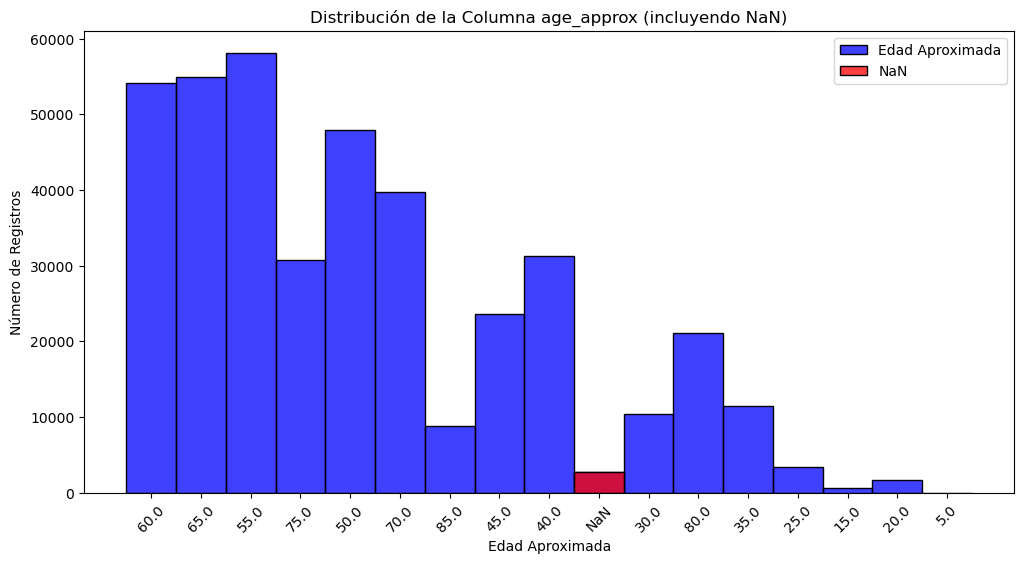

In [54]:

# Crear una columna 'age_approx_nan' para marcar los valores nulos
metadata['age_approx_nan'] = metadata['age_approx'].astype(str).replace('nan', 'NaN')


# Crear un histograma de la distribución de 'age_approx', incluyendo 'NaN'
plt.figure(figsize=(12, 6))

sns.histplot(data=metadata, x='age_approx_nan', discrete=True, kde=False, bins=30, color='blue', label='Edad Aproximada')

# Añadir una segunda serie para la categoría 'NaN' y colorearla en rojo
for age in metadata['age_approx_nan'].unique():
    if age == 'NaN':
        sns.histplot(metadata[metadata['age_approx_nan'] == 'NaN'], x='age_approx_nan', discrete=True, kde=False, bins=30, color='red', label='NaN')

# Añadir título y etiquetas
plt.title('Distribución de la Columna age_approx (incluyendo NaN)')
plt.xlabel('Edad Aproximada')
plt.ylabel('Número de Registros')

# Añadir leyenda
plt.legend()

# Ajustar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

completamos loa valores nulos

In [55]:
# Rellenar valores faltantes en 'age_approx' basado en el mismo patient_id
metadata['age_approx'] = metadata.groupby('patient_id')['age_approx'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Calcular la moda de la columna 'age_approx'
age_moda = metadata['age_approx'].mode()[0]
print(f"La moda de la columna 'age_approx' es: {age_moda}")

# Rellenar los valores faltantes en 'age_approx' con la moda
metadata['age_approx'].fillna(age_moda, inplace=True)

# Contar los valores nulos (NaN) en la columna 'age_approx'
print(f"Valores nulos en 'age_approx': {metadata['age_approx'].isna().sum()}")


La moda de la columna 'age_approx' es: 55.0
Valores nulos en 'age_approx': 0


Ahora verificaremos la columna anatom_site_general para la comprobacion de valores nulos y tratarlos

In [56]:
# Verificar los valores únicos en la columna 'anatom_site_general'
unique_values = metadata['anatom_site_general'].unique()
print(f"Valores únicos en 'anatom_site_general': {unique_values}")

# Contar los valores nulos en la columna 'anatom_site_general'
null_count = metadata['anatom_site_general'].isna().sum()
print(f"Cantidad de valores nulos en 'anatom_site_general': {null_count}")

# Verificar el conteo de cada valor único, incluyendo los valores nulos
value_counts = metadata['anatom_site_general'].value_counts(dropna=False)
print(f"Conteo de cada valor único en 'anatom_site_general':\n{value_counts}")

Valores únicos en 'anatom_site_general': ['lower extremity' 'head/neck' 'posterior torso' 'anterior torso'
 'upper extremity' nan]
Cantidad de valores nulos en 'anatom_site_general': 5756
Conteo de cada valor único en 'anatom_site_general':
anatom_site_general
posterior torso    121902
lower extremity    103028
anterior torso      87770
upper extremity     70557
head/neck           12046
NaN                  5756
Name: count, dtype: int64


Graficaremos para obtener la explicabilidad de los datos

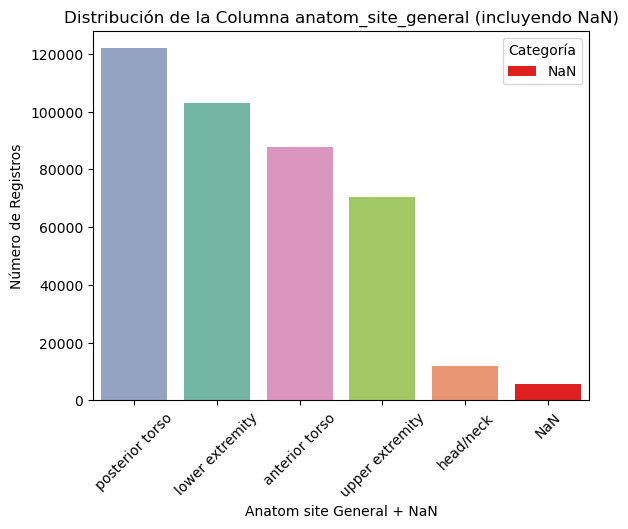

In [57]:
# Crear una columna 'anatom_site_general_nan' para marcar los valores nulos

metadata['anatom_site_general_nan'] = metadata['anatom_site_general'].astype(str).replace('nan', 'NaN')

# Graficar los valores no nulos en un color

sns.countplot(data=metadata[metadata['anatom_site_general_nan'] != 'NaN'], 
              x='anatom_site_general_nan', 
              order=metadata['anatom_site_general_nan'].value_counts().index, 
              palette='Set2', 
              hue='anatom_site_general_nan')

# Graficar los valores nulos en rojo
sns.countplot(data=metadata[metadata['anatom_site_general_nan'] == 'NaN'], 
              x='anatom_site_general_nan', 
              order=['NaN'], 
              color='red', 
              label='NaN')

# Añadir título y etiquetas
plt.title('Distribución de la Columna anatom_site_general (incluyendo NaN)')
plt.xlabel('Anatom site General + NaN')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)  # Rotar etiquetas en el eje x para mayor legibilidad
plt.legend(title='Categoría')

# Mostrar el gráfico
plt.show()

ya que en cada paciente hay datos de todo tipo y en todas las partes del cuerpo, rellenaremos los datos faltantes con la moda

In [58]:
'''Aplicar ffill y bfill:
	•	x.fillna(method='ffill'): Rellena los valores NaN hacia adelante, es decir, con el valor anterior en el grupo.
	•	.fillna(method='bfill'): Luego rellena los valores NaN que aún queden, pero hacia atrás, con el siguiente valor en el grupo.'''


# Rellenar valores NaN en 'anatom_site_general' por patient_id usando ffill y bfill
metadata['anatom_site_general'] = metadata.groupby('patient_id')['anatom_site_general'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Verificar si aún existen valores nulos en la columna después de rellenar
print("Valores nulos restantes en 'anatom_site_general':", metadata['anatom_site_general'].isna().sum())

Valores nulos restantes en 'anatom_site_general': 2188


Como aun tenemos valores nulos, quiere decir que existen registros d pacientes dond ningun valor sta asignado a anaton_site_general asi que rellenaremos con moda tomando en cuenta todo el dataset

In [59]:
# Paso 1: Calcular la moda global de la columna 'anatom_site_general'
global_mode = metadata['anatom_site_general'].mode()[0]

# Paso 2: Rellenar los valores NaN restantes con la moda global
metadata['anatom_site_general'].fillna(global_mode, inplace=True)

# Verificar si aún existen valores nulos en la columna después de rellenar
print("Valores nulos restantes en 'anatom_site_general':", metadata['anatom_site_general'].isna().sum())

Valores nulos restantes en 'anatom_site_general': 0


procedamos a eliminar columnas que aparecen totalmente vacias o con todas las variabls iguales, tambien eliminaremos la columna patient_id

In [60]:
# Eliminar las columnas especificadas
metadata = metadata.drop(columns=['image_type', 'iddx_2', 'iddx_3','patient_id','mel_mitotic_index','iddx_4','anatom_site_general_nan','age_approx_nan','sex_nan','iddx_5'])

# Verificar que las columnas han sido eliminadas
print("Columnas restantes después de la eliminación:")
print(metadata.columns)

Columnas restantes después de la eliminación:
Index(['isic_id', 'target', 'age_approx', 'sex', 'anatom_site_general',
       'clin_size_long_diam_mm', 'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext',
       'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
       'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
       'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
       'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB',
       'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_location',
       'tbp_lv_location_simple', 'tbp_lv_minorAxisMM',
       'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color',
       'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL',
       'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle',
       'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'attribution', 'copyright_license',
       'lesion_id', 'iddx_full', 'iddx_1', 'mel_thick_mm',
       'tbp_lv_dnn_lesion_confidence'],
  

ya que esta limpio el dataset, procedemos a cambiar el indice por la columna "isic_id" para usarla como referencia ya que coincide con el nombre de las fotos que tenemos como parte del conjunto de entrenamiento y test 

In [61]:

# Cambiar el índice a la columna 'isic_id'
metadata.set_index('isic_id', inplace=True)

# Verificar que el cambio se ha realizado correctamente
print(metadata.head())  # Muestra las primeras filas del DataFrame con el nuevo índice

              target  age_approx   sex anatom_site_general  \
isic_id                                                      
ISIC_0015670       0        60.0  male     lower extremity   
ISIC_0015845       0        60.0  male           head/neck   
ISIC_0015864       0        60.0  male     posterior torso   
ISIC_0015902       0        65.0  male      anterior torso   
ISIC_0024200       0        55.0  male      anterior torso   

              clin_size_long_diam_mm tbp_tile_type   tbp_lv_A  tbp_lv_Aext  \
isic_id                                                                      
ISIC_0015670                    3.04     3D: white  20.244422    16.261975   
ISIC_0015845                    1.10     3D: white  31.712570    25.364740   
ISIC_0015864                    3.40        3D: XP  22.575830    17.128170   
ISIC_0015902                    3.22        3D: XP  14.242329    12.164757   
ISIC_0024200                    2.73     3D: white  24.725520    20.057470   

               tbp

In [64]:
# Guardar el DataFrame como un nuevo archivo CSV
output_path = '/Users/luiseduardogarciablanco/Desktop/bootcamp/Proyecto_Final_Cancer/data/metadata_limpio.csv'
metadata.to_csv(output_path)

print(f"El DataFrame ha sido guardado exitosamente en {output_path}")

El DataFrame ha sido guardado exitosamente en /Users/luiseduardogarciablanco/Desktop/bootcamp/Proyecto_Final_Cancer/data/metadata_limpio.csv
